In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [3]:
# read and claen the data file from task III (image word relationship test)
# let the user choose the file

from tkinter import Tk     
from tkinter.filedialog import askopenfilename
import pandas as pd

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing

datafile = askopenfilename(title="Choose the data file from the experiment, TH mode")
imgordth = pd.read_csv(datafile)
datafile = askopenfilename(title="Choose the data file from the experiment, EN mode")
imgorden = pd.read_csv(datafile)


In [4]:
# claenadata
def III_cut_and_clean(prepdf):
    cutdf = prepdf.iloc[1:241][["lang","wordid","truestate","image.started","key_resp.started","key_resp.keys","key_resp.rt"]].reset_index(drop=True)
    cutdf = cutdf.rename({"image.started":"word_show","key_resp.started":"image_show","key_resp.keys":"key","key_resp.rt":"key_RT"}, axis="columns")
    return cutdf

imgordth = III_cut_and_clean(imgordth)
imgorden = III_cut_and_clean(imgorden)
imgordall = pd.concat([imgordth,imgorden], ignore_index=True)

# call the reference table
oldword = pd.read_excel("./image test/ref/wordlist_dict.xlsx")
newword = pd.read_excel("./image test/ref/newwordlist_dict.xlsx")


In [5]:
# add word that actually show and add is it an old or new word
# also add length of that word

# but need to read the file language first
def III_wordload_len_learnt(cutdf):
    if cutdf.iloc[0,0] == 1:
        print("thai language experiemnt loaded")
        globallang = 'th'

    elif cutdf.iloc[0,0] == 2:
        print("english language experiemnt loaded")
        globallang = 'en'

    else:
        print("??????????????????? what file did you choose dawg?")

    for i in range(0,len(cutdf.index)):
        idnow = cutdf.loc[i,"wordid"]
        if idnow in oldword['imgid'].values :
            wordshown = oldword.loc[(oldword['imgid'] == idnow), [globallang]].values[0]
            cutdf.loc[i,"word shown"] = wordshown
            cutdf.loc[i,"old-new"] = "old"

        elif idnow in newword['imgid'].values:
            wordshown = newword.loc[(newword['imgid'] == idnow), [globallang]].values[0]
            cutdf.loc[i,"word shown"] = wordshown
            cutdf.loc[i,"old-new"] = "new"
        else:
            print("unkown id used in the experiment file, stopping loop")
            break

        cutdf.loc[i, "len"] = len(wordshown[0])


In [6]:
III_wordload_len_learnt(imgorden)
III_wordload_len_learnt(imgordth)
III_wordload_len_learnt(imgordall)

english language experiemnt loaded
thai language experiemnt loaded
thai language experiemnt loaded


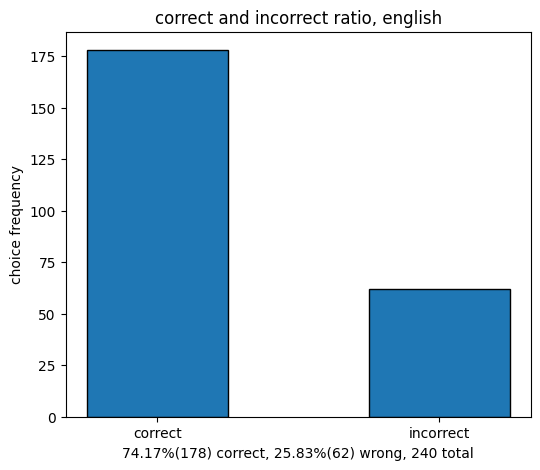

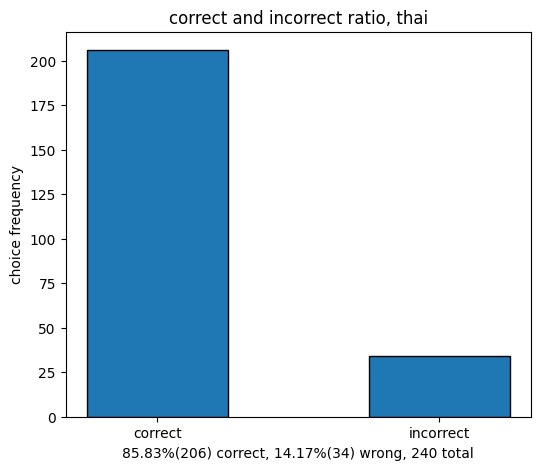

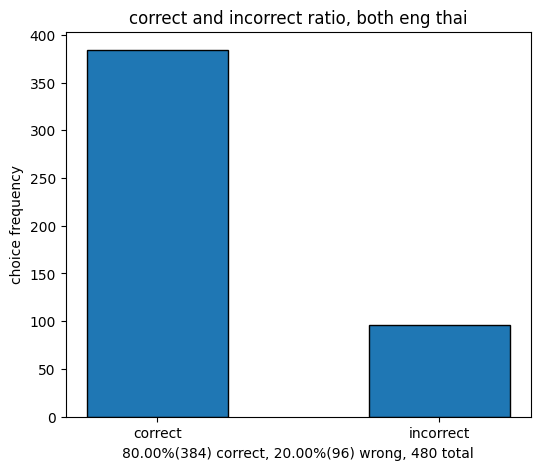

In [7]:
# read the key and truestate file --> assign scoer --> plot total score in each correct and incorrect
def III_plot_total_score(cutdf, titlelang, dir):
    cutdf.loc[(cutdf["truestate"] == 0) & (cutdf["key"] == 'z'),"score"] = 0
    cutdf.loc[(cutdf["truestate"] == 0) & (cutdf["key"] == 'x'),"score"] = 1
    cutdf.loc[(cutdf["truestate"] == 1) & (cutdf["key"] == 'z'),"score"] = 1
    cutdf.loc[(cutdf["truestate"] == 1) & (cutdf["key"] == 'x'),"score"] = 0

    correctscore = cutdf.loc[cutdf['score'] == 1, "score"].count()
    wrongscore = cutdf.loc[cutdf['score'] == 0,"score"].count()
    total = correctscore + wrongscore

    xlabelstr = f"{100*correctscore / total:.2f}%({correctscore}) correct, {100*wrongscore / total:.2f}%({wrongscore}) wrong, {total} total"
    
    plt.figure(figsize=(6, 5))
    plt.bar(["correct", "incorrect"],[correctscore, wrongscore], width=0.5, edgecolor='black')
    plt.title(f"correct and incorrect ratio, {titlelang}")
    plt.ylabel("choice frequency")
    plt.xlabel(xlabelstr)
    plt.savefig(dir)

III_plot_total_score(imgorden, "english", "./figure/III-ratio EN.png")
III_plot_total_score(imgordth, "thai", "./figure/III-ratio TH.png")
III_plot_total_score(imgordall, "both eng thai", "./figure/III-ratio all.png")

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

def III_plot_chi_square(df, dir, title="Chi-Square Test: Word Length vs Correct/Wrong"):
    """
    Plots a chi-square test result as a stacked bar chart.
    
    Parameters:
        df (pd.DataFrame): DataFrame with 'len' (word length) and 'score' (0 or 1).
        title (str): Title of the plot.
    """
    # Create a contingency table
    contingency_table = pd.crosstab(df['score'], df['len'])
    contingency_table.index = ['wrong', 'correct']

    # Perform Chi-Square Test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Print the results
    print("Contingency Table:")
    print(contingency_table)
    print(f"\nChi-Square Statistic: {chi2:.2f}, p-value: {p:.4f}")

    # Plot the results
    ax = contingency_table.T.plot(kind='bar', stacked=True, color=['#e74c3c','#3498db'], edgecolor='black', figsize=(8, 5))

    # Add labels on top of bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, fontweight='light', color='black', padding=3)
        

    # Set dynamic y-limit
    max_height = max([bar.get_y() + bar.get_height() for container in ax.containers for bar in container]) + 10
    ax.set_ylim(0, max_height)

    plt.xlabel("Word Length")
    plt.ylabel("Count")
    plt.title(title)
    plt.legend(title="Score")
    plt.xticks(rotation=0)

    plt.savefig(dir)



Contingency Table:
len      3.0  4.0  5.0  6.0  7.0
wrong      4   24   25   20   23
correct   52   64  111   84   73

Chi-Square Statistic: 9.90, p-value: 0.0422
Contingency Table:
len      3.0  4.0  5.0  6.0  7.0
wrong      9   20   13   10   10
correct   47   32   43   34   22

Chi-Square Statistic: 8.03, p-value: 0.0907
Contingency Table:
len      3.0  4.0  5.0  6.0  7.0
wrong      4   24   25   20   23
correct   52   64  111   84   73

Chi-Square Statistic: 9.90, p-value: 0.0422


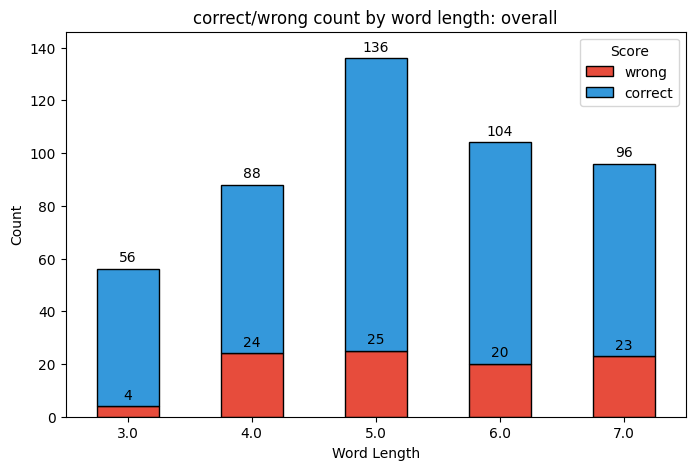

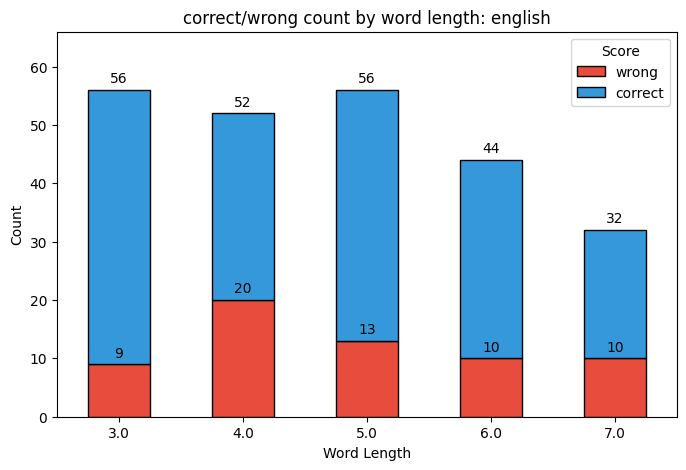

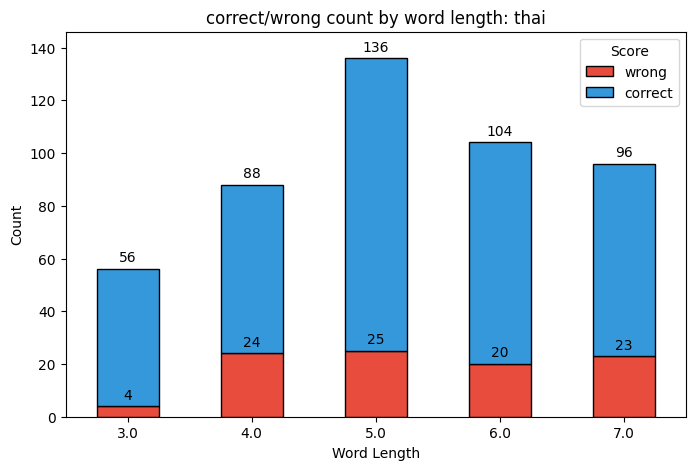

In [9]:
III_plot_chi_square(imgordall, "./figure/III-ratio by len all.png", "correct/wrong count by word length: overall" )
III_plot_chi_square(imgorden, "./figure/III-ratio by len EN.png", "correct/wrong count by word length: english")
III_plot_chi_square(imgordall, "./figure/III-ratio by len TH.png", "correct/wrong count by word length: thai")

In [10]:

def III_plot_correct_proportion(df, dir, title="Proportion of Correct Responses by Word Length"):
    """
    Plots the proportion of correct responses for each word length as a bar chart.

    Parameters:
        df (pd.DataFrame): DataFrame with 'len' (word length) and 'score' (0 or 1).
        title (str): Title of the plot.
    """
    # Calculate proportions
    proportion_df = df.groupby('len')['score'].mean() * 100  # Convert to percentage

    # Plot
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(x=proportion_df.index, y=proportion_df.values, palette='coolwarm', edgecolor='black',width=0.5)

    # Add labels on top of bars
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}%", 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10, fontweight='light', color='black')

    # Formatting
    plt.xlabel("Word Length")
    plt.ylabel("Correct Proportion (%)")
    plt.title(title)
    plt.ylim(0, 100)  # Ensure percentage scale

    plt.savefig(dir)


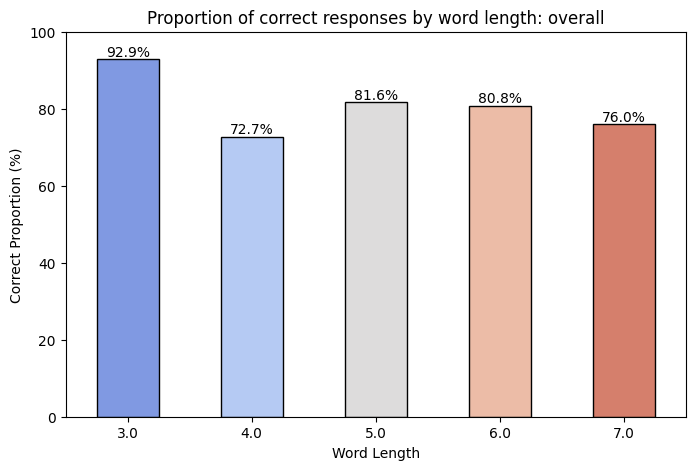

In [11]:
III_plot_correct_proportion(imgordall,"./figure/III-percent by len all.png", "Proportion of correct responses by word length: overall")

In [12]:


def III_plot_grouped_proportion(df1, df2, dir, title="Comparison of Correct Proportion by Word Length"):
    """
    Plots the proportion of correct responses for two DataFrames as a grouped bar chart.

    Parameters:
        df1 (pd.DataFrame): First dataset with 'len' and 'score'.
        df2 (pd.DataFrame): Second dataset with 'len' and 'score'.
        labels (tuple): Labels for the two datasets (e.g., ("Dataset 1", "Dataset 2")).
        title (str): Title of the plot.
    """
    # Calculate proportions
    proportion_df1 = df1.groupby('len')['score'].mean() * 100
    proportion_df2 = df2.groupby('len')['score'].mean() * 100

    # Merge into a single DataFrame for plotting
    labels=["thai", "english"]
    prop_df = pd.DataFrame({labels[0]: proportion_df1, labels[1]: proportion_df2}).reset_index()

    # Plot

    ax = prop_df.plot(x='len', kind='bar', width=0.8, edgecolor='black', color=['coral', 'orange'], alpha=0.8,figsize=(12, 5))

    # Add percentage labels
    for bars in ax.containers:
        ax.bar_label(bars, fmt="%.1f%%", padding=3, fontsize=10, fontweight='light', color='black')

    # Formatting
    plt.xlabel("Word Length")
    plt.ylabel("Correct Proportion (%)")
    plt.title(title)
    plt.xticks(rotation=0)
    plt.ylim(0, 100)  # Ensure percentage scale
    plt.legend(title="Dataset", labels=["thai", "english"])

    plt.savefig(dir)



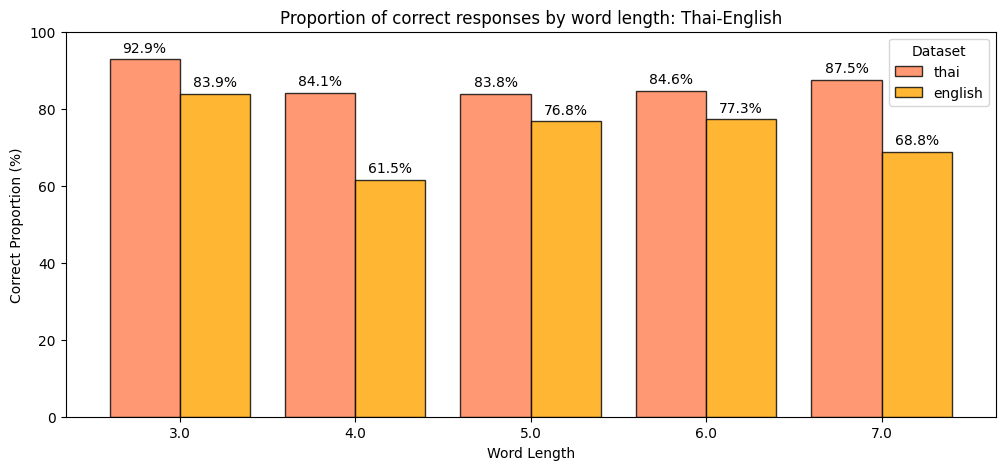

In [13]:
III_plot_grouped_proportion(imgordth,imgorden,"./figure/III-percent by len TH-EN.png","Proportion of correct responses by word length: Thai-English")